reference code for the python machine learning book: https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch03/ch03.ipynb

# Load Data

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [35]:
iris = datasets.load_iris()

In [36]:
iris_pre = pd.DataFrame(iris.data)

In [38]:
iris_pre.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [41]:
iris_pre.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


# Train-test split

In [3]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
# stratift = y means split by preserving the percentage of samples for each class of y
# to try the function of stratify, you can remove the stratify and see the np.bincount() result is different!

In [8]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))
# np.bincount means count the number of each unique value in an array of non-negative integers
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


# Standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
X_train_std = sc.transform(X_train)

In [14]:
X_test_std = sc.transform(X_test)

# Logistics Regression - training

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr = LogisticRegression(C = 100.0)

In [55]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# visualize decision boundry - 2D

more reference about plot_decision_regions in mlxtend: https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

My problem is that if the data has more than two predictors, is it possible to visualize it?

In [26]:
#!pip install mlxtend

In [27]:
from mlxtend.plotting import plot_decision_regions

In [56]:
X_combined_std = np.vstack((X_train_std, X_test_std))

In [57]:
y_combined = np.hstack((y_train, y_test))

Here is the decision boundry, and this graph doesn't include any test data.

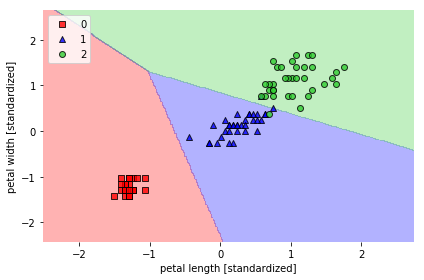

In [58]:
plot_decision_regions(X = X_train_std, y = y_train, clf = lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_06.png', dpi=300)
plt.show()

Here is the decision boundry including the test data using "X_highlight = X_test_std". The syntax is little different from the textbook probabily becuase it's an old version syntax. For more explanation on syntax, refer to the link given under the logistics regression title. 

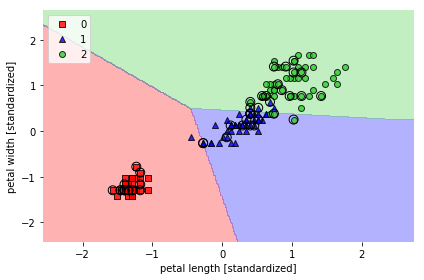

In [52]:
plot_decision_regions(X = X_combined_std, y = y_combined, clf = lr, X_highlight = X_test_std)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_06.png', dpi=300)
plt.show()

# Logistics Regression - predicting

In [62]:
lr.predict(X_test_std)

array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1])

To understand what does the output of the lr.predict mean, refer to page 72 of the book, you will see that for each row/sample, the logistics regression will give you the probability that this sample belongs to each of the classes, and the class with the highest probability will be the final prediction for the sample, and the index of this class will be returned as the output. And the index starts from 0 instead of 1. 

To-do:

need to continue with page 73, and refer to code on https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch03/ch03.ipynb